# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural network for classification problems

A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary Classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state= 42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to undestand right now ... let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


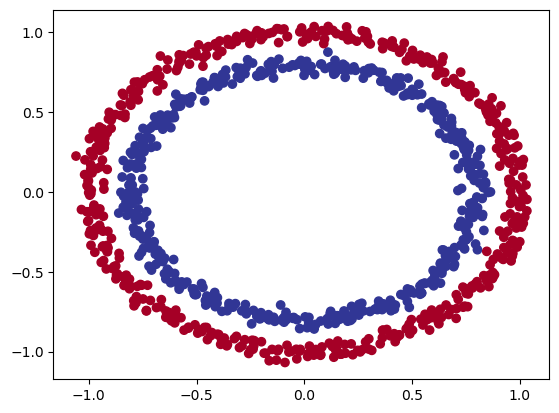

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0 ], X[:, 1], c=y, cmap= plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate.. 

In [9]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compile model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['accuracy'])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [10]:
# Let's try and improve our model by training for longer...

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as it's guessing
So let's step things up a notch and add an extra layer

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

In [12]:
# 4. Evaluate the model 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within layers.
2. Compile a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fight our model for more epochs (leave it training for longer).


In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 nerons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 2.9659 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7231 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.4500
Epoch 11/

To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y, show=False):
    """
    Plots the decision boundary created by a model prediction on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our predictions to geth them ready for plotting
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary 
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha= 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s=40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if show:
        plt.show()

doing binary classification


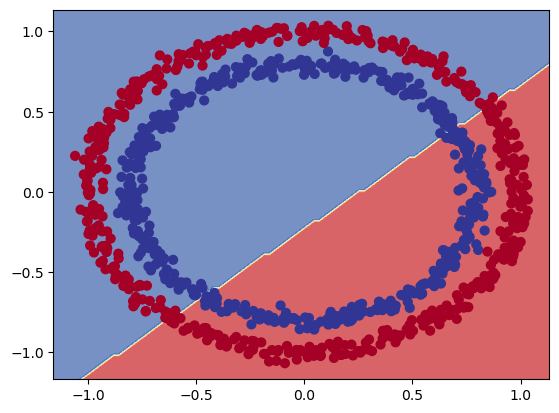

In [15]:
# Chekout the predictions our model is making

plot_decision_boundary(model = model_3,
                      X=X, 
                      y=y,
                      show = True)

Let's see if our model can be used for a regression problem.......
But wait we compiled our model for binary classification problem. But... we're now working on a regression problem, let's change the model to suir our data

In [16]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with our regression specific 
model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

#3. Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs= 100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9374 - mae: 45.9374
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

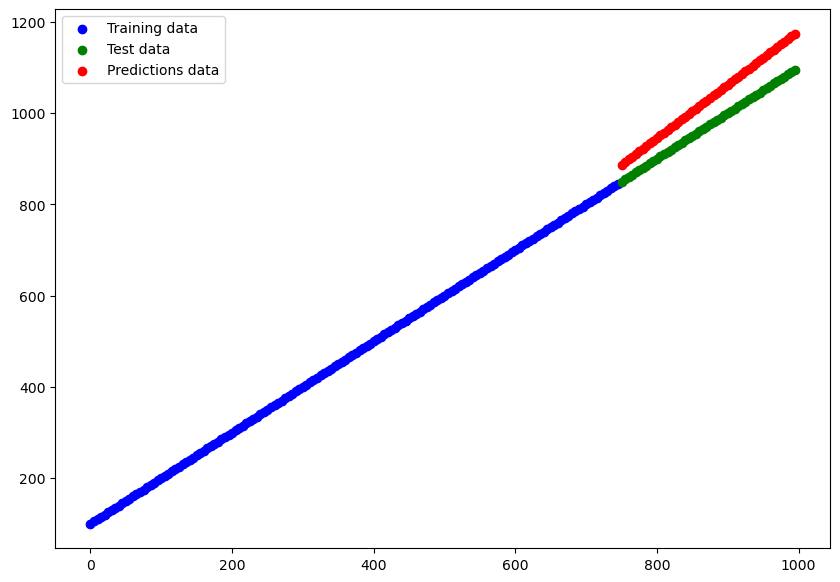

In [17]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = 'Test data' )
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = 'Predictions data')
plt.legend()
plt.show()

## The missing piece: Non-linearity

In [18]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

doing binary classification


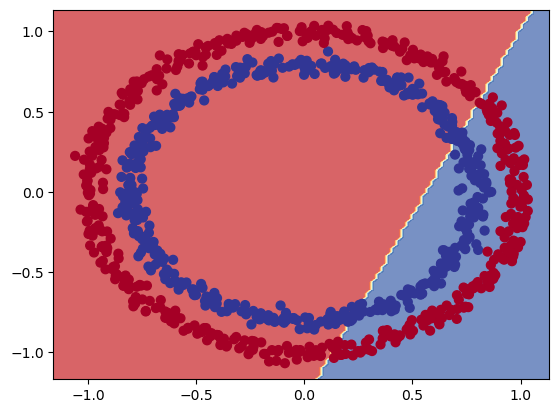

In [19]:
# check the decision boundary for our latest model
plot_decision_boundary(model = model_4,
                      X = X,
                      y = y,
                      show = True)

Let's try build our first neural network with a non-linear activation function

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

Replicate multi-layer neural network with activation function and adding more neurons

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs =100)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

doing binary classification


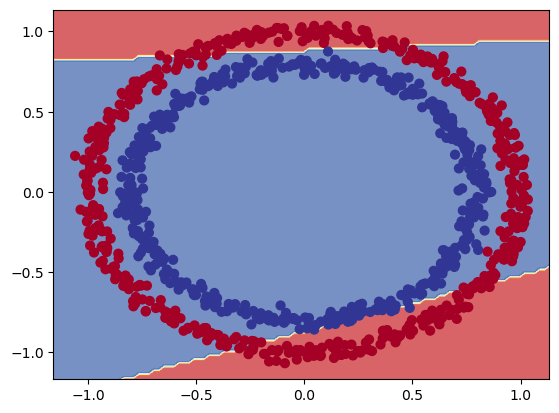

In [22]:
# How do our model predictions look?
plot_decision_boundary(model = model_6,
                      X = X,
                      y = y,
                      show = True)

Finally changing the activation function for the last layer

In [23]:
# Set the seed
tf.random.set_seed(42)

# Construct the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# Compile the model

model_7.compile(loss = tf.keras.metrics.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

doing binary classification


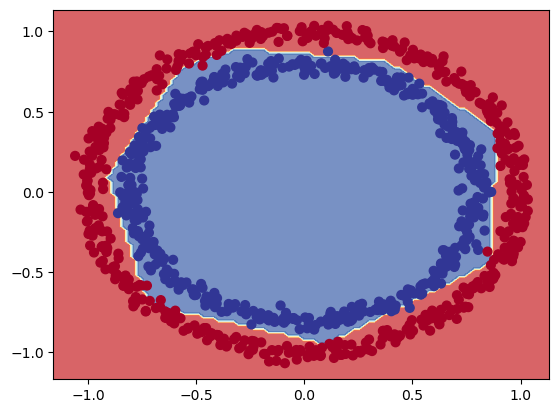

In [24]:
# Let's visualize our incredible metrics
plot_decision_boundary(model = model_7,
                      X = X,
                      y = y,
                      show = True)

🤔 **Question** 

What's wrong with the predictions we've made are we really evaluating our model correctly?
Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:**  

The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is on of the key fundamentas of neural networks

Now we've discover the concept of linear and non-linear functions (or lines), let's see them in action

In [25]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

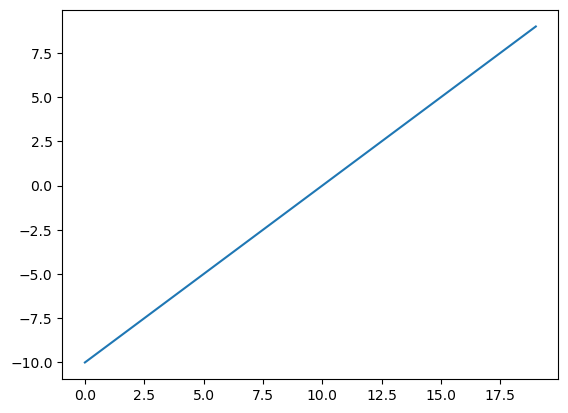

In [26]:
# Visualize our toy tensor
plt.plot(A)
plt.show()

In [27]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
A_sigmoid = sigmoid(A)

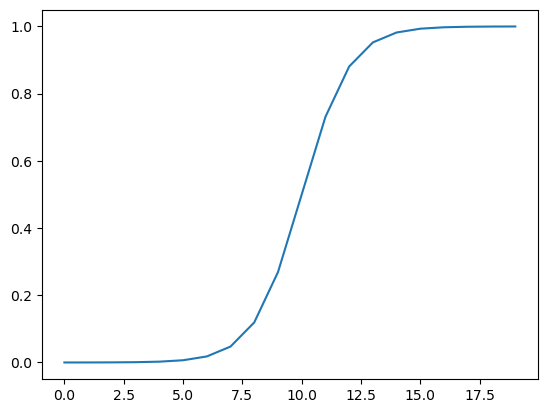

In [28]:
# Plot our toy tensor transformed by sigmoid
plt.plot(A_sigmoid)
plt.show()

In [29]:
# Let's recreate ReLu function
def relu(x):
    return tf.maximum(0 , x)

# Pass our toy tensor to our custom relu function
A_relu = relu(A)

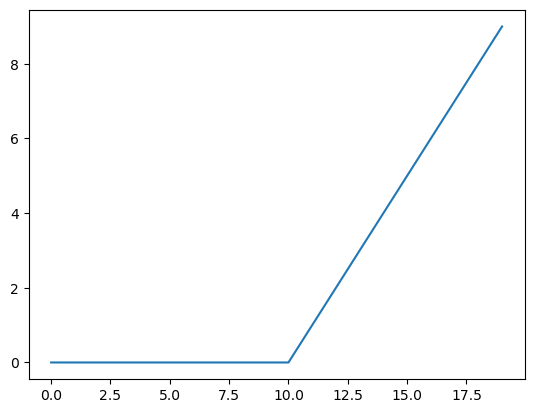

In [30]:
# Plot ReLu-modified tensor
plt.plot(A_relu)
plt.show()

In [31]:
# Finally let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

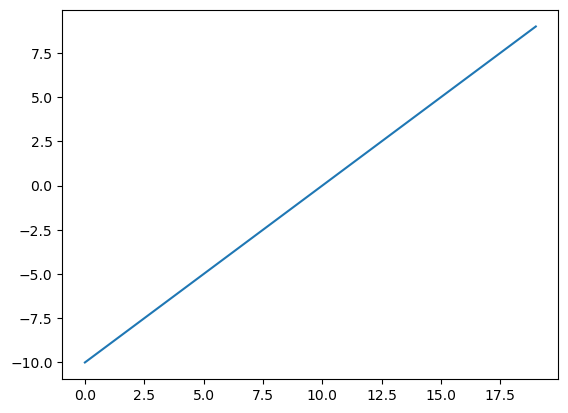

In [32]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))
plt.show()

In [33]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machin learning this is basically a sin.

So let's create a traning and test set

In [34]:
# Creck how many examples we have
len(X)

1000

In [35]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# Let's recreate a model to fit on the trainign data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_8.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy'])

# 3. Fitting the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/25
25/25 [

In [37]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

doing binary classification
doing binary classification


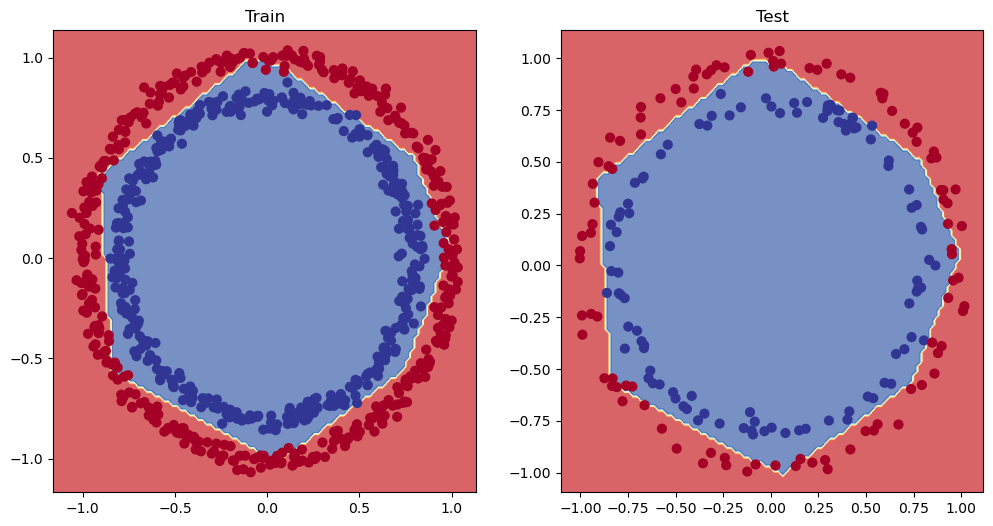

In [38]:
# Plot the decision boundaries for the training and test sets
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2 ,1)
plt.title('Train')
plot_decision_boundary(model_8,
                       X = X_train,
                       y = y_train,
                        show = False)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8,
                       X = X_test,
                       y = y_test,
                      show = False)
plt.show();

## Plot the loss (or training curves)

In [39]:
# Convert into a dataframe
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125


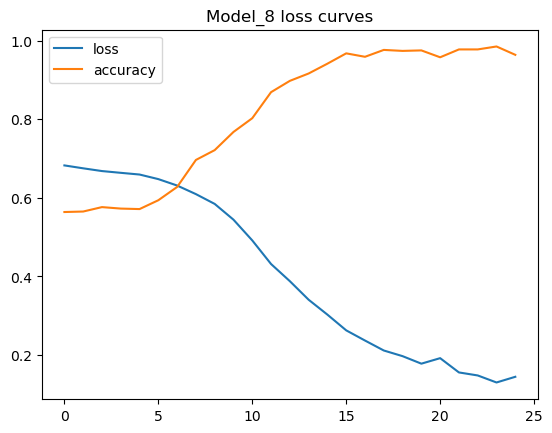

In [40]:
hist_df.plot()
plt.title('Model_8 loss curves')
plt.show()

🔑 **Note**: For many problems the loss function going down means the model is improving (the prediction it's making are getting close to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model **while** it's training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

# Compile the model

model_9.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                       callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5100
Epoch 11/

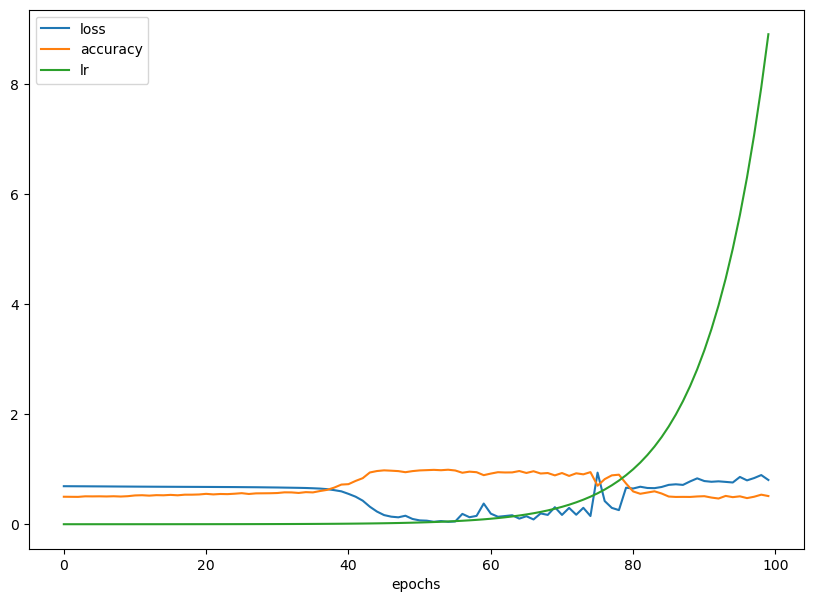

In [42]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = 'epochs')
plt.show()

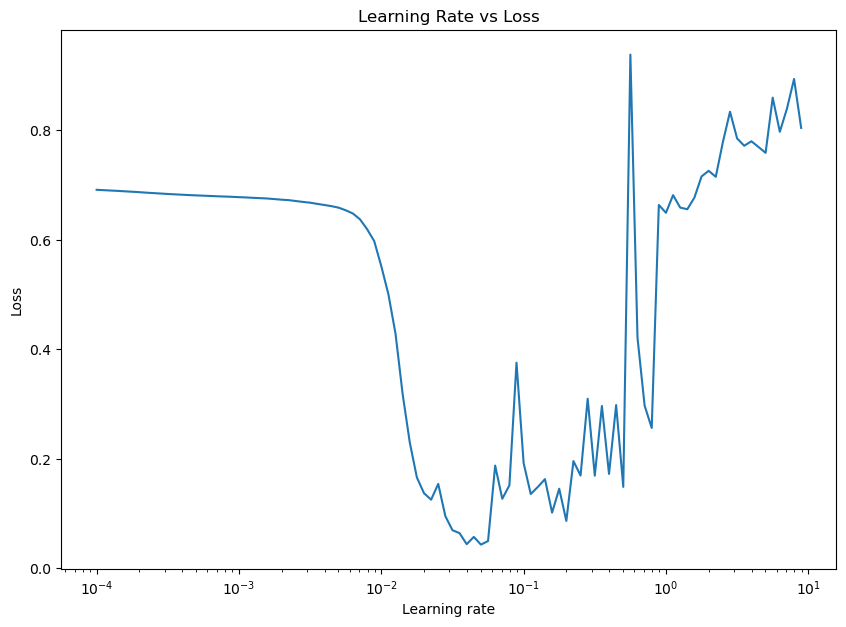

In [43]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show()

In [44]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [45]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

# Compile the model with the ideal learning rate
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/25
25/25 [

In [46]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.1072 - accuracy: 0.9750


[0.1071704849600792, 0.9750000238418579]

In [47]:
# Evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

doing binary classification
doing binary classification


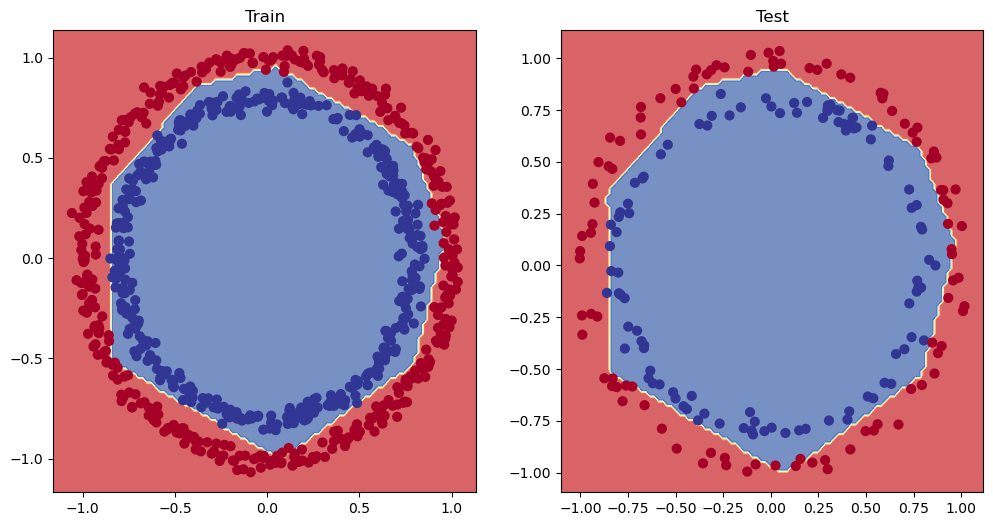

In [48]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation metrics

Alongside visualizing our model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy 
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [49]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy*100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on the test set: 0.1071704849600792
Model accuracy on the test set: 97.50%


How about a confusion matrix?

In [50]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 1, 99]], dtype=int64)

How about we prettify our confusion matrix?

In [51]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn plot confusion matrix

import itertools

def plot_confusion_matrix(y_true, y_pred):
    figsize = (10,10)

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize cm
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize = figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes
    classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title ='Confusion Matrix',
          xlabel = 'Predicted Label',
          ylabel = 'True Label',
          xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} {cm_norm[i, j]*100:1f}%',
                horizontalalignment = 'center', 
                color = 'white' if cm[i, j] > threshold else 'black',
                size = 15)
    plt.show();

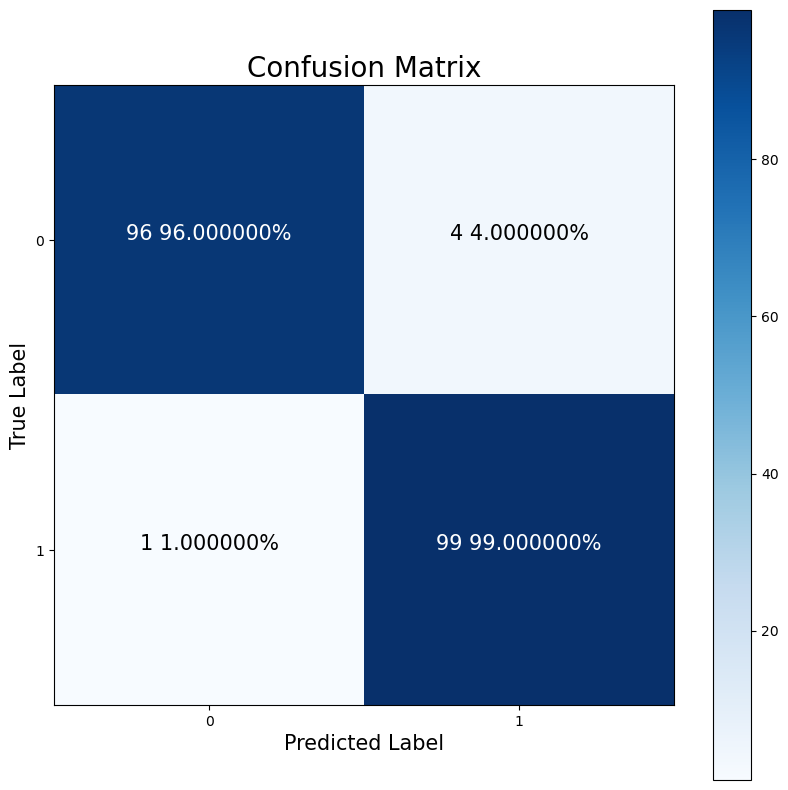

In [52]:
plot_confusion_matrix(y_test, tf.round(y_preds))

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's a multi-class classification.
* It also means if you have 100 different classes, it's a multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [54]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training sample:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [56]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

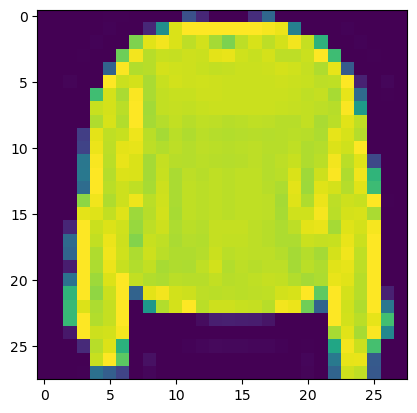

In [59]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])
plt.show()

In [60]:
# Check out samples label
train_labels[7]

2

In [61]:
# Create a small list so we can index onto our trianing labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

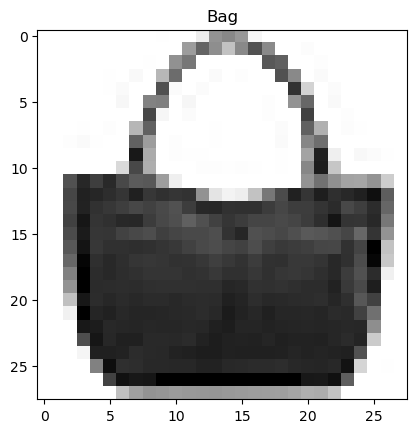

In [65]:
# Plot an example image and its label 
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()

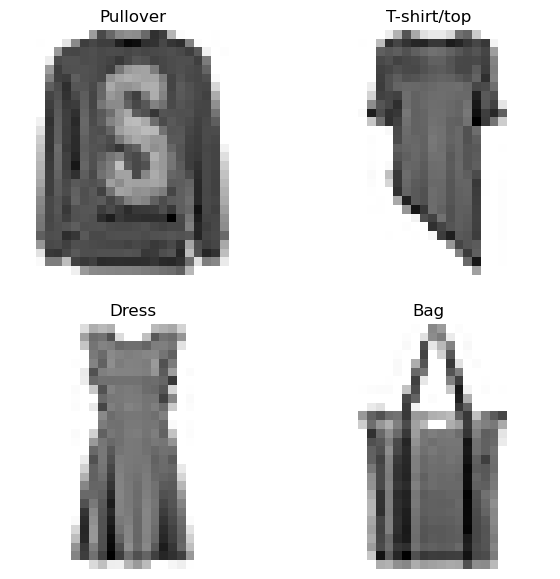

In [70]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7 ,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
plt.show();

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded use CategoricalCrossEntropy()
    * If your labels are integer form use SparseCategoricalCrossEntropy()
* Output layer activation = Softmax(not sigmoid)

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # our data needs to be flattened (from 28*28 to None, 784)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), #Sparse used since isn't one-hot
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                               train_labels,
                               epochs = 10,
                               validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1792 - accuracy: 0.1608 - val_loss: 1.8065 - val_accuracy: 0.2020
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7194 - accuracy: 0.2439 - val_loss: 1.6586 - val_accuracy: 0.3100
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6398 - accuracy: 0.2831 - val_loss: 1.6194 - val_accuracy: 0.2739
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6125 - accuracy: 0.2902 - val_loss: 1.6007 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5963 - accuracy: 0.3058 - val_loss: 1.5776 - val_accuracy: 0.3338
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5880 - accuracy: 0.3124 - val_loss: 1.5642 - val_accuracy: 0.3196
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5782 - accuracy: 0.3196 - val_loss: 1.5733 - val_accuracy:

Now trying one-hot encoding:

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # our data needs to be flattened (from 28*28 to None, 784)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(), #Sparse used since isn't one-hot
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                               tf.one_hot(train_labels, depth=10),
                               epochs = 10,
                               validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1792 - accuracy: 0.1608 - val_loss: 1.8065 - val_accuracy: 0.2020
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7194 - accuracy: 0.2439 - val_loss: 1.6586 - val_accuracy: 0.3100
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6398 - accuracy: 0.2831 - val_loss: 1.6194 - val_accuracy: 0.2739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6125 - accuracy: 0.2902 - val_loss: 1.6007 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5963 - accuracy: 0.3058 - val_loss: 1.5776 - val_accuracy: 0.3338
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5880 - accuracy: 0.3124 - val_loss: 1.5642 - val_accuracy: 0.3196
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5782 - accuracy: 0.3196 - val_loss: 1.5733 - val_accuracy:

In [78]:
# Check the model summary
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have a number in the tensors they try to find patterns between 0 & 1.

In [80]:
# We can get our training and testing data between 0 and 1 by divind by the maximim
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                             train_labels,
                             epochs = 10, 
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🔑 **Note:** Nerual networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

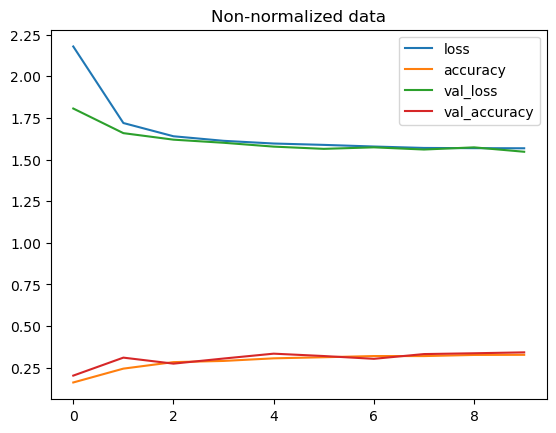

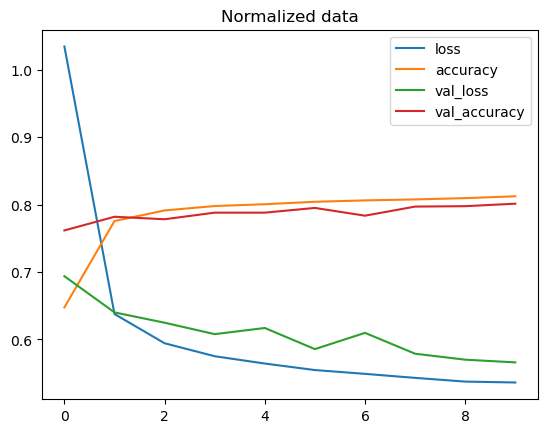

In [84]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title ='Non-normalized data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')
plt.show()

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're compring them on the same criteria (e.g. same architeture but different data or same data but different architecture)

## Finding the ideal learning rate

In [85]:
# Set random seed 
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# Compile model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                              train_labels,
                              epochs = 40,
                              validation_data = (test_data_norm, test_labels),
                              callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

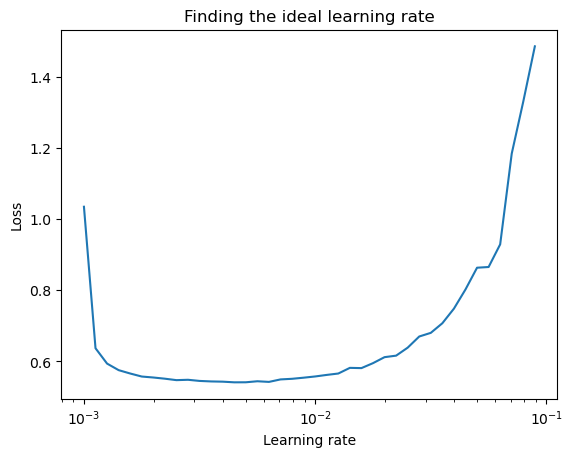

In [89]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')
plt.show()

In [88]:
10**-3 

0.001

In [91]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-3),
                 metrics = ['accuracy']
                )

# Fit the model
history_14 = model_14.fit(train_data_norm,
                         train_labels,
                         epochs = 20,
                         validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classificaiton matrix (such as a confusion matrix)
* Assess some of its predicitons (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...


In [112]:
def make_confusion_matrix(y_true, y_pred, classes = None, figsize=(10,10), text_size = 15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize cm
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize = figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title ='Confusion Matrix',
          xlabel = 'Predicted Label',
          ylabel = 'True Label',
          xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                horizontalalignment = 'center', 
                color = 'white' if cm[i, j] > threshold else 'black',
                size = text_size)
    plt.show();

In [102]:
# Create a confusion matrix
y_probs = model_14.predict(test_data_norm)

array([[8.5630308e-11, 3.5361904e-13, 2.6633779e-05, 4.6356206e-08,
        5.0949806e-05, 9.6119151e-02, 8.1778360e-08, 9.1868937e-02,
        4.0605241e-03, 8.0787367e-01]], dtype=float32)

In [104]:
y_probs[0], tf.argmax(y_probs[0])

(array([8.5630308e-11, 3.5361904e-13, 2.6633779e-05, 4.6356206e-08,
        5.0949806e-05, 9.6119151e-02, 8.1778360e-08, 9.1868937e-02,
        4.0605241e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [105]:
# Convert all the prediction probabilites into integers
y_preds = y_probs.argmax(axis =1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

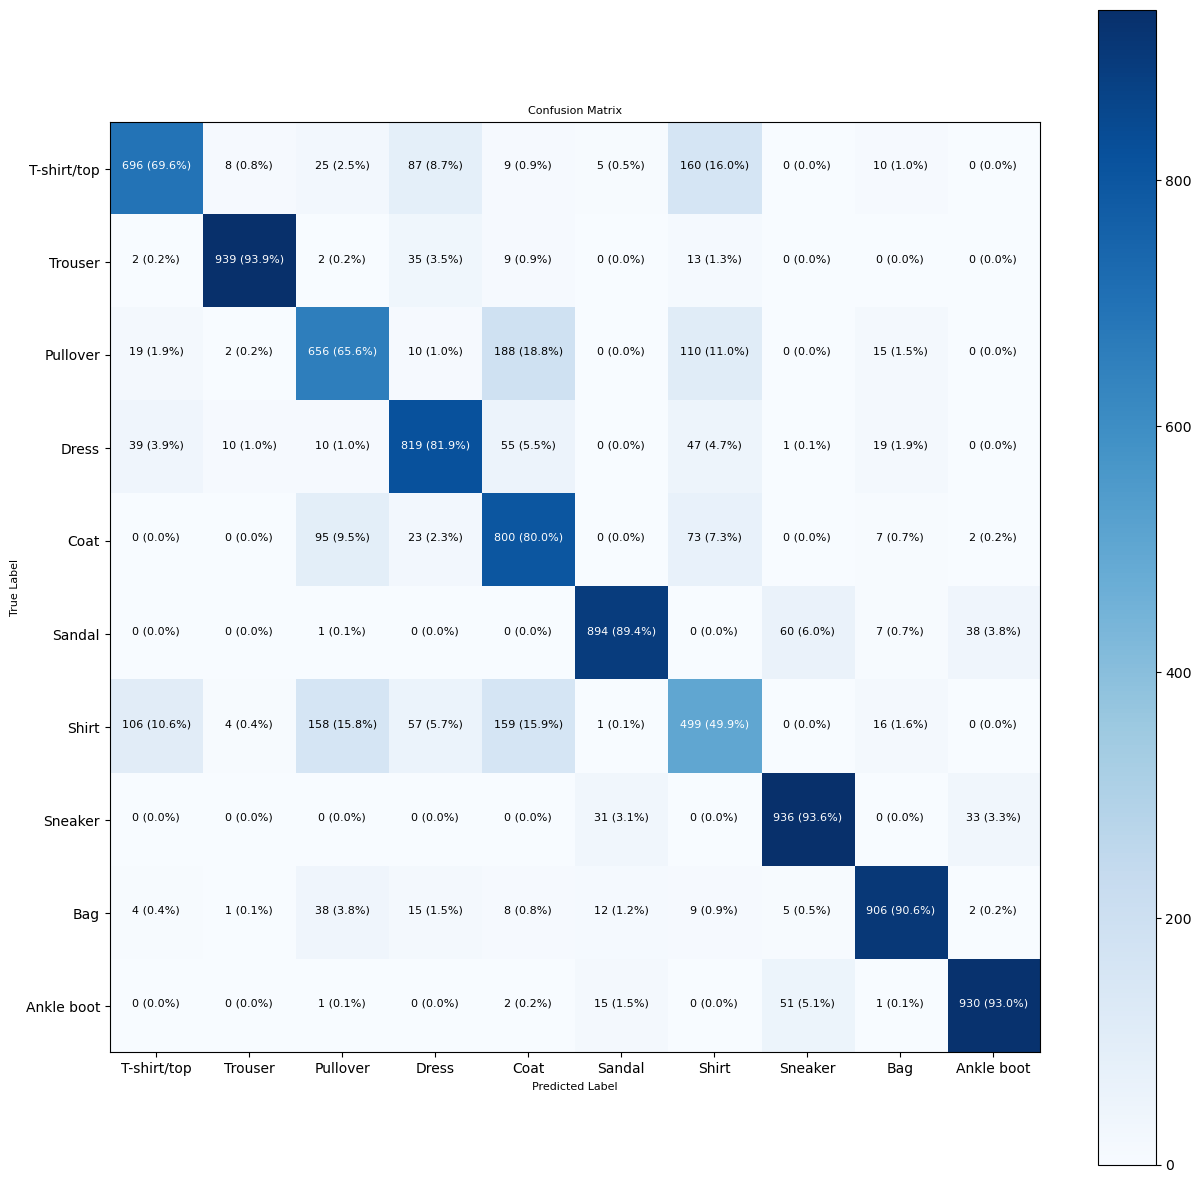

In [113]:
make_confusion_matrix(y_true = test_labels,
                     y_pred = y_preds,
                     classes = class_names,
                     text_size = 8,
                     figsize = (15, 15))

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said imagen 
* Label the plot with truth label & predicted label

In [119]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer 
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred {} {:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
              color = color) # set the color to green or red based on if prediction is right or wrong
    
    plt.show()

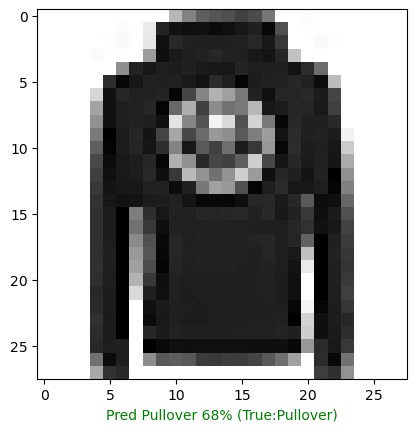

In [123]:
# Checkout random image as well as it's prediction
plot_random_image(model = model_14,
                 images = test_data_norm,
                 true_labels = test_labels,
                 classes= class_names)

## What patterns is our model learning?

In [124]:
# Find the layers of our most recent model
model_14.layers

In [125]:
# Extract a particular layer
model_14.layers[1]

In [127]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[ 0.7150264 , -0.060771  , -0.997631  , -1.0484312 ],
        [ 0.27732146, -0.47155455, -0.52916485,  0.0232927 ],
        [ 0.7752434 ,  0.5402752 , -1.1288568 , -0.7426154 ],
        ...,
        [-0.39453384,  0.47628698, -0.22641553,  0.2550595 ],
        [-0.40515733,  0.6181009 ,  0.23928422, -0.5038759 ],
        [ 0.23884602,  0.11606907, -0.12131339,  0.04352411]],
       dtype=float32),
 (784, 4))

Now let's checkout the bias vector..

In [131]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4486054e-02, -6.1475381e-04, -2.7230176e-01,  8.1124920e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paried with a weights matrix.

The bias vector get initialized  as zeros (at least in the case of Tensorflow Dense Layer)

The bias vector dictates how much the patterns within corresponding weights matrix should influence the next layer.

In [132]:
model_14.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


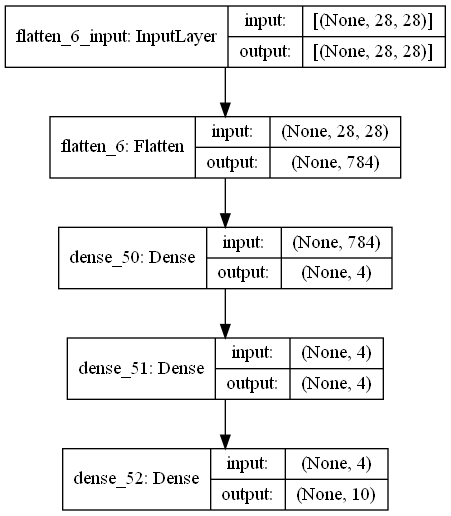

In [133]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes = True)